# Analyzing the Stroop Effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Let's have a first glance at the [dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1551381596262000).

First, let's import the necessary :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Now, let's load the dataset.

In [2]:
df_stroop = pd.read_csv('stroopdata.csv')
df_stroop.head(2)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741


This dataset contains results from a number of participants in the Stroop task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

The performance corresponds to the total time in second of the experiment (TTE). The smaller the TTE is, the better the performance.

In [3]:
df_stroop.info(), df_stroop.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


(None, Congruent      0
 Incongruent    0
 dtype: int64)

There are 24 rows in the dataset, it is very small and it might not represent fully the population. There are no missing values.

## Thoughts about the dataset

(1) What is the independent variable? What is the dependent variable?

The **independent variable** is wether it is the congruent words condition or the the incongruent words condition.

The **dependent variable is** the time it takes for the participant to name the ink color.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

An appropriate set of hypotheses for this task is :
$$H_0 : \mu_{incong} \leq  \mu_{cong}$$
$$H_1 :  \mu_{incong} > \mu_{cong}$$
Where $\mu_{cong}$ represents the population TTE mean under the congruent words condition and $\mu_{incong}$ represents the population TTE mean under the incongruent words condition.

This set of hypotheses states that :
- the null hypothesis is the hypothesis where the population TTE mean under the incongruent task is lower or equal to the population TTE mean under the congruent task.
- the alternative hypothesis is the hypothesis where the population TTE mean under the incongruent task is greater than the population TTE mean under the congruent task.

As each participant was asked to perform the tasks under both the congruent words condition and the incongruent words condition, we are dealing with paired observations.  We could then use a **Paired T-Test** with a level $\alpha=0.05$ to compare the population TTE means under the congruent and incongruent words condition. The assumptions that underpin a paired t-test would be met :
- the dependent variable is continuous : the time (s) is continuous.
- the independent variable consist of two categorical, "related groups" or "matched pairs" : congruent and incongruent categories.
- there are no proven outliers : the only suspicious data can be explained by the small size of the dataset (see below).
- the distribution of the differences in the dependent variable between the two related groups are aproximately normally distributed.

We could also realize a **95% confidence interval** which is equivalent to a T-Test with a level $\alpha=0.05$.

However in this analyse we are going to use the **sample bootstrapping** method (with a level $\alpha=0.05$) as it relies on less assumptions and this is also a particularly used method in the lessons.

## The exploration

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Let's see how the values are distributed :

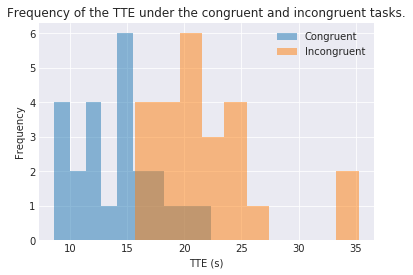

In [4]:
plt.hist(df_stroop['Congruent'], alpha=0.5, label='Congruent')
plt.hist(df_stroop['Incongruent'], alpha=0.5, label='Incongruent')
plt.legend(loc='upper right')
plt.title('Frequency of the TTE under the congruent and incongruent tasks.')
plt.xlabel('TTE (s)')
plt.ylabel('Frequency');

In [5]:
df_stroop.mean(), df_stroop.std()

(Congruent      14.051125
 Incongruent    22.015917
 dtype: float64, Congruent      3.559358
 Incongruent    4.797057
 dtype: float64)

At first glance, the TTE under the incongruent task seems to be most of the time bigger than under the congruent task, meaning that the performance under the congruent task seems to be better. The means seem to go in this direction with a mean of 14.05 for the congruent task and a mean of 22.02 for the incongruent task. The values are slightly more spread out under the incongruent task with a standard deviation of 4.80 than under the congruent task with a standard deviation of 3.56.

For the incongruent task, we can see a bin alone around 35. This can be an outlier, however the small size of the dataset can be responsible.

The shape of these distributions seems to be rather right-skewed. Let boxplot the congruent and incongruent tasks :

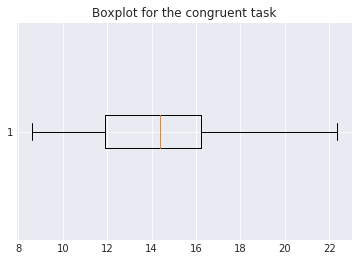

In [6]:
plt.boxplot(df_stroop['Congruent'], vert=False)
plt.title('Boxplot for the congruent task');

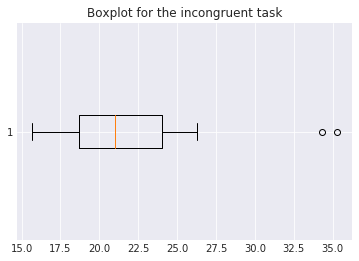

In [7]:
plt.boxplot(df_stroop['Incongruent'], vert=False)
plt.title('Boxplot for the incongruent task');

While the boxplot for the congruent task seems to be rather right-skewed, the boxplot for the incongruent task seems rather symmetric with some outliers. Again, this might be because of the small size of the dataset.

If we stand with the right-skewed distribution, the median might be a better measure of center :

In [8]:
# median 
np.percentile(df_stroop['Congruent'], 50), np.percentile(df_stroop['Incongruent'], 50)

(14.3565, 21.017499999999998)

The median of both congruent and incongruent tasks are very close to the mean computed above, so we might say that the distributions of both congruent and incongruent tasks are approximately normally distributed.

## The statistical test

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [9]:
# Sample we have
sample_size = df_stroop.shape[0]
cong_sample = df_stroop['Congruent']
cong_sample_mean = cong_sample.mean()
incong_sample = df_stroop['Incongruent']
incong_sample_mean = incong_sample.mean()
sample_diff_mean = incong_sample_mean - cong_sample_mean;
sample_diff_mean

7.9647916666666667

In [10]:
# sample difference mean distribution
diff_means = []

for _ in range(10000):
    cong_other_sample = cong_sample.sample(sample_size, replace=True)
    incong_other_sample = incong_sample.sample(sample_size)
    diff_means.append(incong_other_sample.mean() - cong_other_sample.mean())

diff_means = np.array(diff_means)

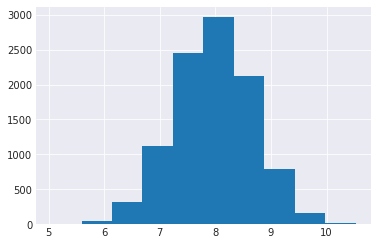

In [11]:
plt.hist(diff_means);

We simulate a distribution of samples (difference of the TTE mean under congruent and incongruent tasks) under the null hypothesis :

In [12]:
simulated_diff_means = np.random.normal(0, diff_means.std(), diff_means.size)

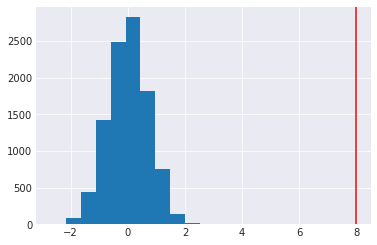

In [13]:
plt.hist(simulated_diff_means)
plt.axvline(x=sample_diff_mean, color='r');

We can see that our statistic is way above the simulated distribution under the null ($\mu_{incong} - \mu_{cong} > 0$), so we can already state that we have statistical significance and we can reject the null hypothesis.

Let's compute the p-value to be certain :

In [14]:
p_value = (simulated_diff_means > sample_diff_mean).mean()
p_value

0.0

The p-value is equal to 0.0, meaning that the probability of observing our statistic (or one more extreme in favor of the alternative) if the hypothesis is true is null. It is thus inferior to our confidence level $\alpha=0.05$.

Our final decision is that we reject the null hypothesis and accept the alternative : the TTE of incongruent tasks is bigger than the TTE of congruent tasks, thus the performance is better under congruent words condition than under incongruent words condition. This matches our expectations.

## To go further

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Learning to read is something we do so early in our lives, that our brains may become accustomed to mechanically read any text that is presented in front of our eyes. The reading reflex might slow down the participant as he has to switch between his reflex and the task of the experiment (which is to analyze the color of the text).

There are other related experiments to the performed Stroop that may produce similar effects : the [numerical stroop effect](https://en.wikipedia.org/wiki/Numerical_Stroop_effect) and the [spatial stroop effect](https://en.wikipedia.org/wiki/Stroop_effect#Spatial) are some examples.

## Sources

[paired t-test](https://statistics.laerd.com/stata-tutorials/paired-t-test-using-stata.php),
[stroop effect](https://en.wikipedia.org/wiki/Stroop_effect)